# Plotting from geotables

In [1]:
%matplotlib inline

In [2]:
import pysal as ps
import numpy as np
from pysal.contrib import pdio
from pysal.contrib.viz import mapping as maps
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import pandas as pd

/home/serge/Dropbox/p/pysal/src/pysal/pysal/core/IOHandlers/__init__.py:25: UserWarning: SQLAlchemy and Geomet not installed, database I/O disabled
  warnings.warn('SQLAlchemy and Geomet not installed, database I/O disabled')


In [3]:
ps.examples.available()

['snow_maps',
 'Line',
 'street_net_pts',
 'arcgis',
 'Point',
 'stl',
 'columbus',
 'geodanet',
 'calemp',
 'Polygon_Holes',
 'newHaven',
 'mexico',
 'nat',
 '10740',
 'chicago',
 'book',
 'juvenile',
 'south',
 'baltim',
 'networks',
 'us_income',
 'sids2',
 'virginia',
 'desmith',
 'sacramento2',
 'burkitt',
 'taz',
 'Polygon',
 'wmat']

In [4]:
db = pdio.read_files(ps.examples.get_path('columbus.shp'))
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 21 columns):
AREA          49 non-null float64
PERIMETER     49 non-null float64
COLUMBUS_     49 non-null int64
COLUMBUS_I    49 non-null int64
POLYID        49 non-null int64
NEIG          49 non-null int64
HOVAL         49 non-null float64
INC           49 non-null float64
CRIME         49 non-null float64
OPEN          49 non-null float64
PLUMB         49 non-null float64
DISCBD        49 non-null float64
X             49 non-null float64
Y             49 non-null float64
NSA           49 non-null float64
NSB           49 non-null float64
EW            49 non-null float64
CP            49 non-null float64
THOUS         49 non-null float64
NEIGNO        49 non-null float64
geometry      49 non-null object
dtypes: float64(16), int64(4), object(1)
memory usage: 8.1+ KB


## `matplotlib` interface

### Basic functionality

The easiest way to obtain a plot of the geometries in a `geotable` is to simply pass the table:

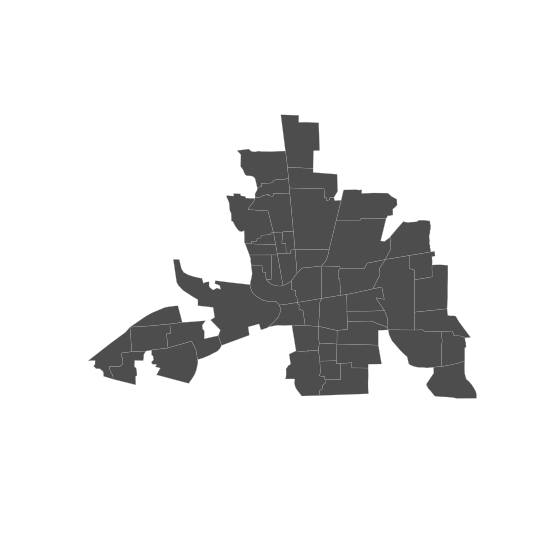

In [5]:
maps.geoplot(db)

If you want a choropleth, you can also add the variable you want to encode:

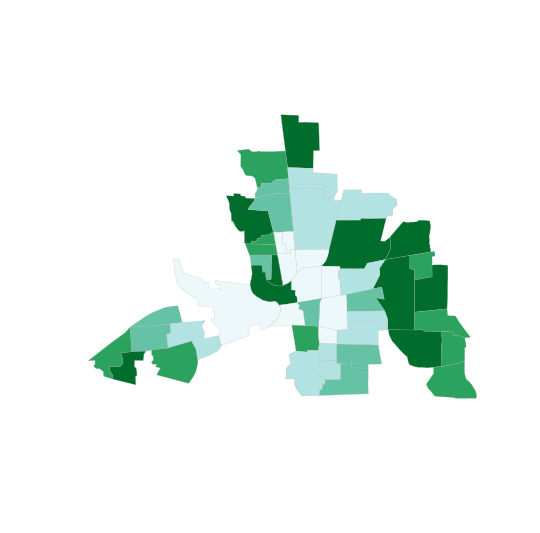

In [6]:
maps.geoplot(db, 'HOVAL')

If you want a specific palette from [Color Brewer](http://colorbrewer2.org), just pass the string with the name:

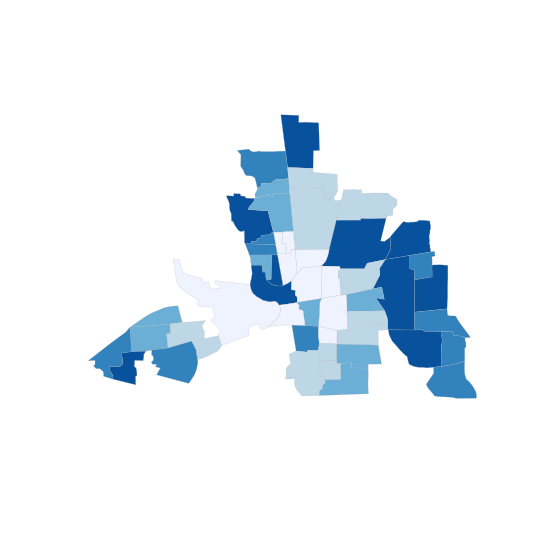

In [7]:
maps.geoplot(db, 'HOVAL', palette='Blues')

By default, we use 5 groups, but you can get a different number modifying `k`:

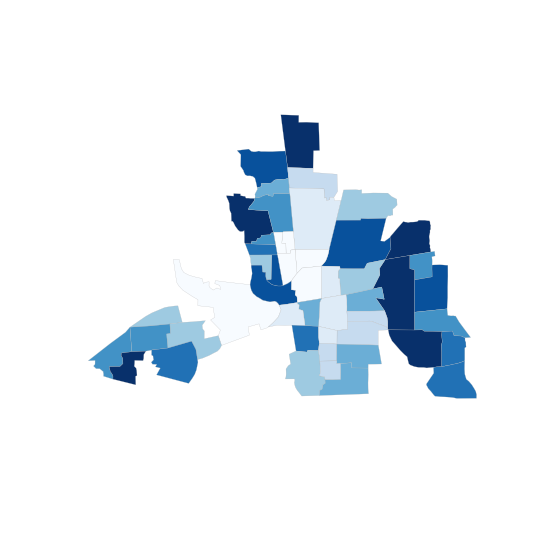

In [8]:
maps.geoplot(db, 'HOVAL', palette='Blues', k=9)

For every Color Brewer palette, you can also call its reverse by specifying `_r` at the end of the name:

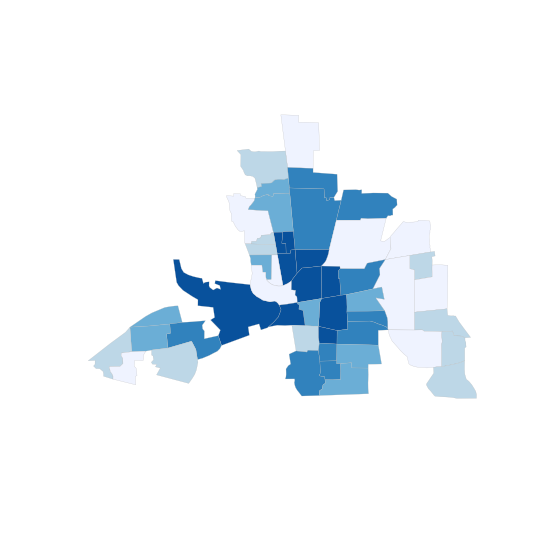

In [9]:
maps.geoplot(db, 'HOVAL', palette='Blues_r')

And, if you really want control, you can pass the `palettable` palette object of your choice directly! Note however that you'll need to figure out yourself the right number of colors. For example the Wes Anderson's `Chevalier_4` palette contains four colors. To display how to use it, we will generate random labels and plot them:

In [10]:
import palettable as pltt
p = pltt.wesanderson.Chevalier_4

/home/serge/anaconda3/envs/pysal2/lib/python2.7/site-packages/ipykernel/__main__.py:1: DeprecationWarning: This function is deprecated. Please call randint(0, 3 + 1) instead
  if __name__ == '__main__':


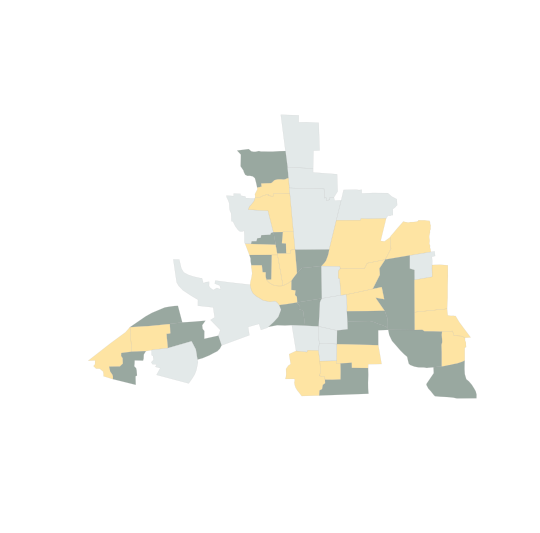

In [11]:
lbls = np.random.random_integers(0, 3, db.shape[0])
# `alpha` is not necessary but is cool (and possible)!
maps.geoplot(db.assign(lbls=lbls), 'lbls', palette=p, k=4, alpha=0.5)

Other examples include:

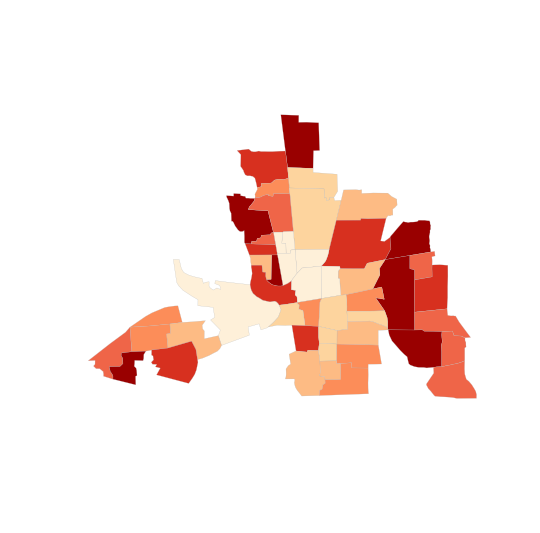

In [12]:
maps.geoplot(db, 'HOVAL', k=7, palette='OrRd')

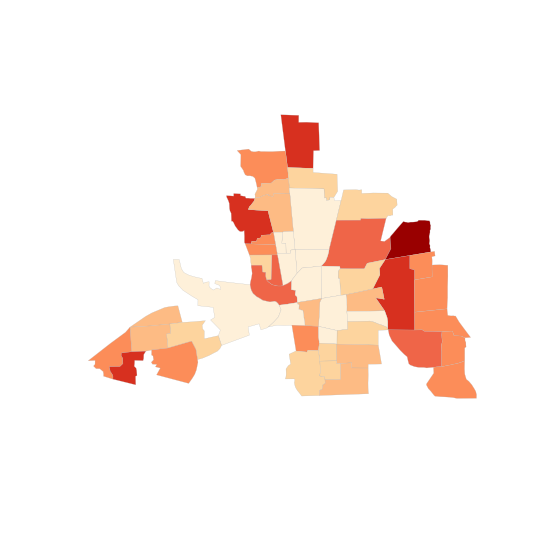

In [13]:
maps.geoplot(db, 'HOVAL', k=7, palette='OrRd', classi='fisher_jenks')

### Advanced capabilities

In [14]:
colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
pal = sns.xkcd_palette(colors)

colors = np.array(pal)[np.random.random_integers(0, high=len(pal)-1, size=db.shape[0])]
colors = pd.Series(colors.tolist(), index=db.index)

/home/serge/anaconda3/envs/pysal2/lib/python2.7/site-packages/ipykernel/__main__.py:4: DeprecationWarning: This function is deprecated. Please call randint(0, 4 + 1) instead


In [21]:
reload(maps);
y = db['HOVAL']
colors, classification = maps.value_classifier(y, 'percentiles')
colors = colors.map({i:j for i,j in enumerate(pal)})
colors.head()

0    (0.509803921569, 0.372549019608, 0.529411764706)
1    (0.482352941176, 0.698039215686, 0.454901960784)
2     (0.658823529412, 0.643137254902, 0.58431372549)
3     (0.658823529412, 0.643137254902, 0.58431372549)
4     (0.658823529412, 0.643137254902, 0.58431372549)
dtype: object

In [22]:
reload(maps);
y = db['HOVAL']
colors, classification = maps.value_classifier(y, 'percentiles')
colors = colors.map({i:j for i,j in enumerate(pal)})
colors.head()

0    (0.509803921569, 0.372549019608, 0.529411764706)
1    (0.482352941176, 0.698039215686, 0.454901960784)
2     (0.658823529412, 0.643137254902, 0.58431372549)
3     (0.658823529412, 0.643137254902, 0.58431372549)
4     (0.658823529412, 0.643137254902, 0.58431372549)
dtype: object

In [17]:
from mapping import classifier

In [18]:
q = classifier['quantiles'](y, k=3)
q.bins

array([ 27.733   ,  41.75    ,  96.400002])

In [23]:
reload(maps);
y = db['HOVAL']
colors, classification = maps.value_classifier(y, 'fisher_jenks', k=6)
colors = colors.map({i:j for i,j in enumerate(pal)})
colors.head()

0     (0.509803921569, 0.372549019608, 0.529411764706)
1      (0.658823529412, 0.643137254902, 0.58431372549)
2    (0.996078431373, 0.701960784314, 0.0313725490196)
3    (0.996078431373, 0.701960784314, 0.0313725490196)
4      (0.21568627451, 0.470588235294, 0.749019607843)
dtype: object

In [24]:
classification.name

'Fisher_Jenks'

ValueError: to_rgba: Invalid rgba arg "nan"
to_rgb: Invalid rgb arg "nan"
cannot convert argument to rgb sequence

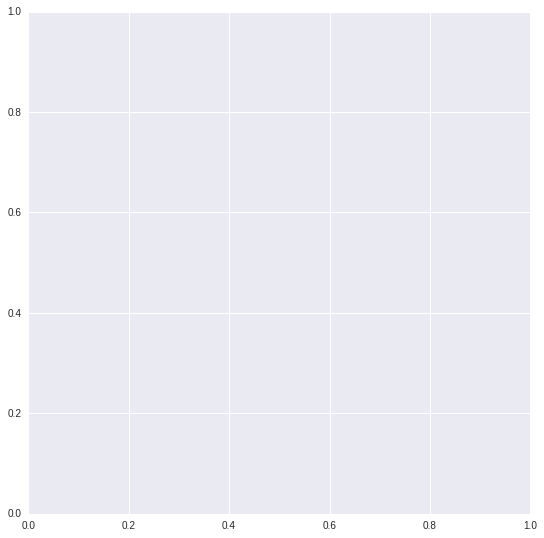

In [25]:
reload(maps);

maps.plot_geocol_mpl(db.loc[:, 'geometry'], facecolor=colors)

## `bokeh` interface

### Basic functionality

In [ ]:
from bokeh.models import HoverTool
from bokeh.palettes import Viridis6
from bokeh.plotting import figure, show, output_file, output_notebook, ColumnDataSource
output_notebook()

In [ ]:
maps.geoplot(db, backend='bk')

In [ ]:
maps.geoplot(db, 'HOVAL', palette='RdPu', backend='bk')

### Advanced capabilities

In [ ]:
reload(maps)

maps.plot_geocol_bk(db['geometry'], marker_size=10, hover=True)

In [ ]:
reload(maps)

maps.plot_geocol_bk(db['geometry'], marker_size=10, hover=True,\
                   facecolor=colors)

In [ ]:
reload(maps)

maps.geoplot(db, col='HOVAL' ,marker_size=10, hover=True,\
             backend='bk')

In [ ]:
reload(maps)

maps.geoplot(db, col='HOVAL' ,marker_size=10, hover=True,\
             backend='bk', classi='fisher_jenks')

In [ ]:
reload(maps)

maps.geoplot(db, col='HOVAL' ,marker_size=10, hover=True,\
             backend='bk', classi='fisher_jenks', palette='OrRd')

In [ ]:
reload(maps)

maps.geoplot(db, col='HOVAL' ,marker_size=10, hover=True,\
             backend='bk', classi='fisher_jenks', palette='OrRd')

In [ ]:
reload(maps)

maps.geoplot(db, col='HOVAL' ,marker_size=10, hover=True,\
             backend='bk', classi='fisher_jenks', palette='OrRd',\
             tips = ['CRIME']
            )

In [ ]:
reload(maps)

maps.geoplot(db, col='CRIME' ,marker_size=10, hover=True,\
             backend='bk', classi='fisher_jenks', palette='OrRd',\
             tips = ['HOVAL']
            )

In [ ]:
gc = db['geometry']
patch_xs = []
patch_ys = []
ids = []
for idx, shape in gc.iteritems():
    for ring in shape.parts:
        xs, ys = zip(*ring)
        patch_xs.append(xs)
        patch_ys.append(ys)
        ids.append(idx)
cds = ColumnDataSource(data=dict(
            x=patch_xs,
            y=patch_ys
            ))

In [ ]:
TOOLS="pan,wheel_zoom,box_zoom,reset,hover"
p = figure(tools=TOOLS, x_axis_location=None, y_axis_location=None)
p.grid.grid_line_color = None

p.patches('x', 'y', source=cds,
  fill_alpha=1.,
  line_color='black', 
  line_width=0.5
  )

show(p)

In [ ]:
reload(maps);

maps.plot_geocol_bk(db.loc[:, 'geometry'], linewidth=10, facecolor=colors)

In [ ]:
TOOLS="pan,wheel_zoom,box_zoom,reset,hover"
p = figure(tools=TOOLS, x_axis_location=None, y_axis_location=None)
p.grid.grid_line_color = None

p.patches('x', 'y', source=cds,
  fill_alpha=1.,
  line_color='black', 
  line_width=0.5
  )

show(p)

In [ ]:
TOOLS="pan,wheel_zoom,box_zoom,reset,hover"
p = figure(tools=TOOLS, x_axis_location=None, y_axis_location=None)
p.grid.grid_line_color = None

p.patches('x', 'y', source=cds,
  fill_alpha=1.,
  line_color='black', 
  line_width=0.5
  )

show(p)

In [ ]:
x = range(10)
y = range(100)

In [ ]:
d = dict(f=x,l=y)

In [ ]:
d

In [ ]:
db.index.values


In [ ]:
db['HOVAL']